# Introduction to Classical Natural Language Processing 

This notebook is a hands-on intro to Classical NLP. The topics covered align with the NLP tasks related to various stages of the NLP pipeline: text processing, text exploration, building features and application level tasks. 

http://www.nltk.org

# 1. Introduction 

1.1 NLTK Setup

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

** 1.2 Crash Course in Regular Expressions **

Regular Expression are a great tool for NLP. They can be used interactively or for rule-based seraching and transformation in programs. 

A cheat sheet for the SEARCH BASICS. 

|Operator|Meaning|Example|Example meaning|
|--|-------------------------------|
|+|one or more| a+|look for 1 or more "a" characters|
|*|zero or more | a*|look for 0 or more "a" characters|
|?|optional| a?|look for 0 or 1 "a"characters|
|[]|choose 1| [abc]|look for "a" or "b" or "c"|
|[-]|range|[a-z]|look for any character between "a" and "z"|
|[^]|not| [^a]|look for character that is not "a"|
|()|grouping| (a-z)+|look for one of more occurences of chars between "a" and "z"|
|ab|follow|ab|look for character "a" followed by chatacter"b"|
|^|start|^a|look for character "a" at start of string/line|
|\s|whitespace|\sa|look for whitespace character followed by "a"|
|.|any character|a.b|look for "a" followed by any char followed by "b"|

1. (|), or operator, (ey|ax)+ , look for strings "ey" or "ax"
2.  $, end, a$, look for character "a" at end of string/line

 
Common Uses:

- re.search    finds first matching object
- re.findall   returns all matching objects
- re.sub       replaces matches with replacement string


In [1]:
#find all occurences of any character between "a" and "z"
import re
re.findall("[a-z]", "$34.33 cash.")

['c', 'a', 's', 'h']

In [3]:
#find all occurences of either "name:" or "phone:"
re.findall("(name|phone):","My name: Joe, my phone: (312)555-1212")

['name', 'phone']

In [4]:
#find "lion", "lions" or "Lion", or "Lions"
re.findall("([lL]ion)s?","Give it to the Lions or the lion.")


['Lion', 'lion']

In [5]:
#replace alll lowercase letters with "x"
re.sub("[a-z]","x","Hey. I know this regex stuff...")

'Hxx. I xxxx xxxx xxxxx xxxxx...'

# 2. Text Processing 

This section introduces some of the tasks and techniques used to acqure, clean and normalize the text data

### 2.1 Data Acquisition 

* where do i get the data i need  
* is it already in digital or it need OCR
* how much will it cost 
* will it be updated/expanded over time? more costs?
* if it is customer data, do i have the legal privacy rights needed to use the data in the way I need for my application? 
* do i have the safeguard needed to securely share the data? 

In [7]:
import nltk 
# show how to access one of the gutenberg books included in NLTK 
print ("gutenberg book ids=", nltk.corpus.gutenberg.fileids())
# The result shows the name of the books that is available 

gutenberg book ids= ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [11]:
# load words from "Alice in wonderland"

alice = nltk.corpus.gutenberg.words("carroll-alice.txt")
print ("len(alice)=", len(alice))
print (alice[:100])

len(alice)= 34110
['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',']


In [13]:
# load words from ""

grail = nltk.corpus.webtext.words("grail.txt")
print("len(grail)=", len(grail))
print (grail[:100])


len(grail)= 16967
['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop', ']', 'KING', 'ARTHUR', ':', 'Whoa', 'there', '!', '[', 'clop', 'clop', 'clop', ']', 'SOLDIER', '#', '1', ':', 'Halt', '!', 'Who', 'goes', 'there', '?', 'ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son', 'of', 'Uther', 'Pendragon', ',', 'from', 'the', 'castle', 'of', 'Camelot', '.', 'King', 'of', 'the', 'Britons', ',', 'defeator', 'of', 'the', 'Saxons', ',', 'sovereign', 'of', 'all', 'England', '!', 'SOLDIER', '#', '1', ':', 'Pull', 'the', 'other', 'one', '!', 'ARTHUR', ':', 'I', 'am', ',', '...', 'and', 'this', 'is', 'my', 'trusty', 'servant', 'Patsy', '.', 'We', 'have', 'ridden', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'in']


### 2.2 Plain Text Extraction

If your text data lives in a non-plain text file(WORD,POWERPOINT,PDF,HTML,etc), you will need to use a "filter" to extract the plain text from the file. Python has a number of libraries to extract plain text from popular formats but they are take seraching and supporting code to use. 

### 2.3 Word and Sentence Segmentation ( Tokenization) 

Word Segmentation Issues: 
* some languages do not white space characters 
* Words with hyphens or apostrophes ( Who's at the drive-in?) 
* Numbers, currency, percentages, dates, times (04/01/2018, $55.000.00)
* Elipses, special characters 

Sentence segmentation issues: 
* Quoted speech with a sentence 
* abbreviations with periods (The Ph.D. was D.O.A)

Tokenization Techniques 
* Perl script( 50 lines) with RegEx
* maxmatch algorithm: (Maxmatch Algorithm tries to find the largest word at the current position and then segments that and then advances on. This is normally used in languages without space characters.)

* themanranafterit -> the man ran after it 
* thetabledownthere -> theta bled own there 
(So one of the classic problems with this is if the sentence like this)

In [ ]:
#code example : simple version of maxmatch algorithm for tokenization and segmentation 
def tokenize(str, dict): 
    s = 0
    words =[]
    
    while (s<len(str)):
        
        #find biggest and in dictionary that matches str[s:xxx]
        for word in dict:
            lw =len(word)
            if(str[s:s+lw] == word):
                words.append(word)
                s +=lw
                found = True
                break
        if (not found): 
            words.append(str[s])
            s += 1
    print (words)
    #retrun words 
    
# small dictionary of know words, largest words first 
dict = ["before","table","after", "where", "there", "bled", "said", "lead", "man", "her", "own", "the","ran","it"]

# this algorithms is designed to work with languages that do not have whitespace characters 
# so simulate that in our test 

tokenize("themanranafterit",dict)  #works
tokenize("thetabledownthere",dict) #fails

['the', 'man', 'ran', 'after', 'it']


In [3]:
#NLTK example word segmentation
nltk.word_tokenize("the man, the ran after it's $3.23 dog on 03/23/2016.")

['the',
 'man',
 ',',
 'the',
 'ran',
 'after',
 'it',
 "'s",
 '$',
 '3.23',
 'dog',
 'on',
 '03/23/2016',
 '.']

In [ ]:
#NLTK example SENTNCE segmentation
nltk.sent_tokenize("The man ran after it. The table down there? Yes, down there!")

### 2.4 Stopword Removal

Stopwords are common words that are not interesting for the app task at hand. So these can be things like 'a',
'the', 'and', 'as', 'um', especially when you're looking for frequency distributions in documents. These little words don't add a lot of meaning, and it sort of get in the way.
* Easy part - removing words that appear in list 
* Tricy part - what to use for stop words? app-dependent, standard lists, high frequencey words in your text,...

In [4]:
# code example: simple algorithm for removing stopwords
stoppers = "a is of the this".split()

def removeStopWords(stopWords, txt):
    newtxt = ' '.join([word for word in txt.split() if word not in stopWords])
    return newtxt

removeStopWords(stoppers, "this is a test of the stop word removal code.")

'test stop word removal code.'

In [5]:
# NLTK example: removing stopwords
from nltk.corpus import stopwords
stops = stopwords.words("English")

print("len(stops)=", len(stops))

removeStopWords(stops, "this is a test of the stop word removal code.")

len(stops)= 179


'test stop word removal code.'

### 2.5 Case Removal 

case removal is part of a larger task called Text Normalization which includes:
    - case removal 
    - stemming
Goal of case removal - converting all text to for example, lower case

In [1]:
str =  "The main ran after it. The table down there? Yes, down there!"
str.lower()

'the main ran after it. the table down there? yes, down there!'

### 2.6 Stemming 

Goal of stemming - strpping of endings and other places called AFFIEXS - for english it is prefixes and suffixes. 

Stemming is the second half of normalization, and this is taking words that have affixes on them like 'ing' or 'ed' or maybe prefixes like 'un', and removing those such that we get a base word. And the base word doesn't have to be a complete word. It just has to be something reliable that we get from all the variations.

- convert word to its base word, called the LEMMA / STEM (e.g., foxes -> fox)

Porter Stemmer
* 100+ cascading "rewrite" rules
* ational -> ate (e.g., relational -> relate)
* ing -> (e.g., playing -> play)
* sess -> ss (e.g., grasses -> grass)





In [8]:
# NLTK example: stemming

def stem_with_porter(words):
    porter = nltk.PorterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words

def stem_with_lancaster(words):
    porter = nltk.LancasterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words

str = "Please don't unbuckle your seat-belt while I am driving, he said"

print("porter:", stem_with_porter(str.split()))
print()
print("lancaster:", stem_with_lancaster(str.split()))

porter: ['pleas', "don't", 'unbuckl', 'your', 'seat-belt', 'while', 'I', 'am', 'driving,', 'he', 'said']

lancaster: ['pleas', "don't", 'unbuckl', 'yo', 'seat-belt', 'whil', 'i', 'am', 'driving,', 'he', 'said']



## 3. Text Exploration
## 3.1 Frequency Analysis

    - Frequency Analysis
    - Letter
    - Word
    - Bigrams
    - Plots


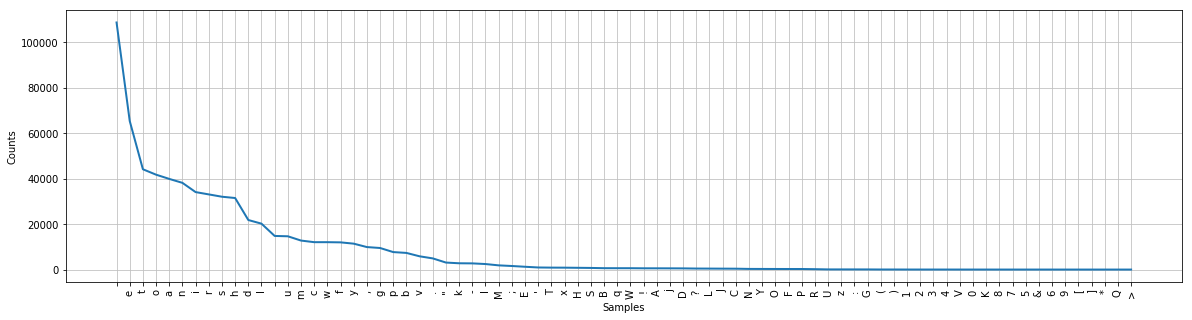

In [9]:
# NLTK example: frequence analysis
import nltk
from nltk.corpus import gutenberg
from nltk.probability import FreqDist

# get raw text from "Sense and Sensibility" by Jane Austen
raw = gutenberg.raw("austen-sense.txt")
fd_letters = FreqDist(raw)

words = gutenberg.words("austen-sense.txt")
fd_words = FreqDist(words)
sas = nltk.Text(words)

# these 2 lines let us size the freq dist plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

# frequency plot for letters from SAS
fd_letters.plot(100)

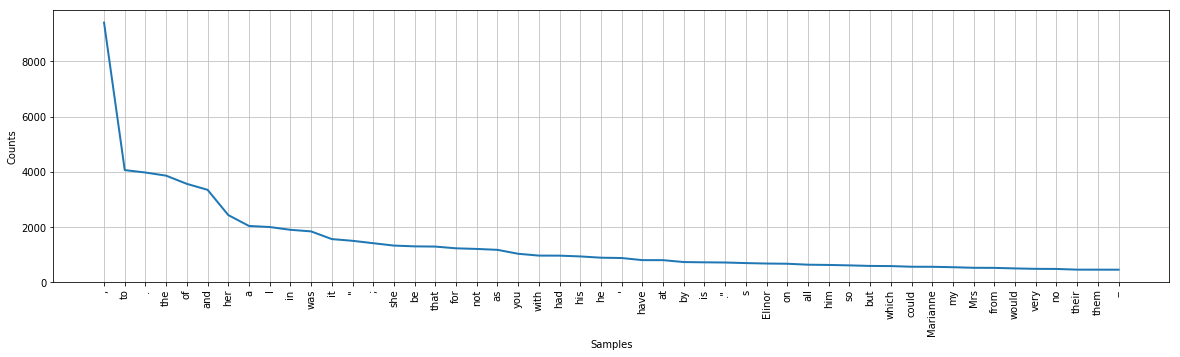

In [10]:
# these 2 lines let us size the freq dist plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# frequency plot for words from SAS
fd_words.plot(50)

## 3.2 Collocations

These are interesting word pairs, usually formed by the most common bigrams. Bigrams are collections of word pairs that occur together in the text.


In [11]:
# Let's look at collocations for our "Sense and Sensibility" text
sas.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


## 3.3 Long words

Sometimes looking at the long words in a text can be revealing. Let's try it on sas.


In [12]:
# Let's look at long wods in the text
longWords = [w for w in set(words) if len(w) > 13]
longWords[:15]

['contemptuously',
 'aggrandizement',
 'insignificance',
 'insurmountable',
 'misconstruction',
 'demonstrations',
 'disappointments',
 'considerations',
 'reasonableness',
 'circumspection',
 'reconciliation',
 'disappointment',
 'congratulating',
 'correspondence',
 'unexhilarating']

## 3.3 Concordance Views

Concordance views, also called Keywords in Context (KWIC), show the specified word with the words that surround it in text. These views can be helpful in understanding how the words are being used in the text.


In [13]:
# Let's try looking at some of these recent words in a Concordance view
sas.concordance("affectionately")
print()

sas.concordance("correspondence")
print()

sas.concordance("dare")
print()

Displaying 2 of 2 matches:
before . She took them all most affectionately by the hand , and expressed gre
ed , took her hand , kissed her affectionately several times , and then gave w

Displaying 4 of 4 matches:
ould not be maintained if their correspondence were to pass through Sir John '
ve been Edward ' s gift ; but a correspondence between them by letter , could 
she had no doubt , and of their correspondence she was not astonished to hear 
e of Edward afforded her by the correspondence , for his name was not even men

Displaying 25 of 36 matches:
 not know what he was talking of , I dare say ; ten to one but he was light - 
l . The assistance he thought of , I dare say , was only such as might be reas
g , if I have plenty of money , as I dare say I shall , we may think about bui
, you will make conquests enough , I dare say , one way or other . Poor Brando
e . He is the curate of the parish I dare say ." " No , THAT he is not . He is
m . He was afraid of catching cold I dare say 

##  3.4 Other Exploration Task/Views

In [14]:
# look at words similar to a word
sas.similar("affection")

attention time regard mother love heart opinion sister wishes wife
arrival marianne kindness family it marriage sisters sake conduct mind


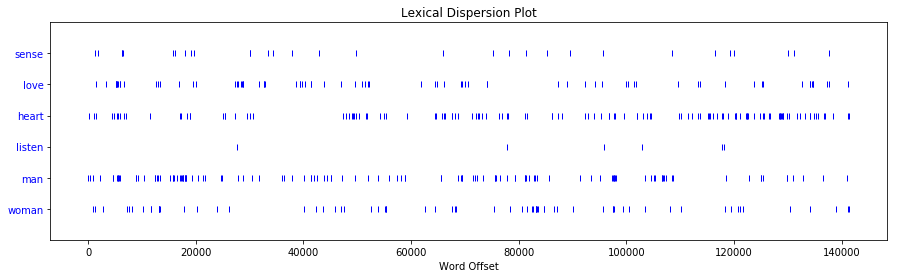

In [15]:
# these 2 lines let us size the freq dist plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))

# look at words as they appear over time in the book/document
sas.dispersion_plot(["sense", "love", "heart", "listen", "man", "woman"])


# 4. Building Features
## 4.1 Bag-of-Words (BOW)

One of the simplest features when dealing with multiple texts (like multiple documents, or multiple sentences within a document), is called Bag-of-Words. It builds a vocabular from each word in the set of texts, and then a feature for each word, indicate the presence/absence of that word within each text. Sometimes, the count of the word is used in place of a presence flag.

A common way to represent a set of features like this is called a One-Hot vector. For example, lets say our vocabular from our set of texts is: 

    today, here, I, a, fine, sun, moon, bird, saw

The sentence we want to build a BOW for is:
    
    I saw a bird today.

Using a 1/0 for each word in the vocabulary, our BOW encoded as a one-hot vector would be:
    
    1 0 1 1 0 0 0 1 1 

# 4.2 N-Grams

N-grams represent the sequence of N words that are found in a text. They are commonly used as a model of the text language since they represent the frequence of words/phrases appearing in the text.

Common types of N-grams:

    unigrams - these are the set of single words appearing in the text
    bigrams - these are the set of word pairs, like "good day" or "big deal", from the text
    trigrams - these are the set of word triples, like "really good food", from the text

To build bigrams for a text, you need to extract all possible word pairs from the text and count how many times each pair occurs. Then, you can use the top N words (1000), or the top percent (50%) as your language model.



# 4.3 Morphological Parsing

Goal : convert input word into its morphological parts. For example: "geese" would return goose + N + PL

Morphological Parsing: geese -> goose + N + PL, caught -> catch + V + PastPart

Morphological parsing is related to stemming, but instead of mapping the word variants to a stem word, it labels the stem word and its affixes.

Morphological parsing, even for English, is quite involved.


## 4.4 TD/IDF

TD/IDF stands for Term Document Inverse Document Frequency. "Term" here can be thought of as a word. This is a measure of the relative importance of a word within a document, in the context of multiple documents.

We start with the TD part - this is simply a normalized frequency of the word in the document:

    (word count in document) / (total words in document)

The IDF is a weighting of the uniquess of the word across all of the documents. Here is the complete formula of TD/IDF: 

    td_idf(t,d) = wc(t,d)/wc(d)/ dc(t)/dc()

    where:
        wc(td) = # of occurrences of term t in doc d
        wc(d) = # of words in doc d
        dc(t) = # of docs that contain at least 1 occurrence of term t
        dc() = # of docs in collection 




## 4.5 Word Sense Disambiguation ( WSD) 

Related to POS tagging, WSD is use to distinguish between difference senses of a word. Each sense of the word uses the same POS tag, but means something different. In parts of speech tagging, you want to tag each word to sentence with
the kind of a tag that denotes like this is a verb or a noun or an adjective.  But in word sense disambiguation,
you have a word that is the same word tagging, if you will, but has a different sense.

for example: 

    - she served the king
    - she served the ball

(served is a verb, but they mean different things. She served the king is serving him dinner or serving him a drink or something. And she served the ball was like playing tennis and the ball has been served.)

    - he took his money to the bank.
    - he took his canoe to the bank.
(They're both nouns, so part of speech tag won't necessarily help you here. You really need to go a little further.)

## 4.6 Anaphora Resolution 


Examples: 
        
        Sam and Bill left with the toys. They were later found.

So what does they really referring to in this case? Is it Sam and Bill or is it the toys? And that's what this task is about. It's joining these kind of references to their original subjects.

## 4.7 Part-of-speech(POS) tagging 

- Verb, noun, adjective, etc. 
- Simple tag set: 19 word classes.

"They refuse to permit us to obtain a refuse permit"

What tagset to use?
- Brown Corpus ( 87 tags) 
- C5 tagset (61 tags) 
- Penn Treebank ( 45 tags) 


Type of Taggers 
- rule-based :  where you can try and figure out a combination of rules.There's rule-based tagging where you apply rules maybe in regular expressions, or maybe as statements in your code to narrow down the cases for each particular word and tag and generalize where possible.
- Lookup : There's looking up where you can look up the word in a repository, and see what tags it is, and you can also do that either through a single word,
- N-Gram : if you do it using N-grams then you have a better idea of how the word's being used in context, and the accuracy of the tag will be higher.
- Hybrid and Backoff 
- Brill Tagger ( learns rules) 
- HMM Tagger (Hidden Markov Model tagger) 


### HMM Tagger 

Hidden Markov Models with the weather example, and we're going to show here how to use it for creating a parts-of-speech tagger,

##  5. Classical NLP Applications

### 5.1 Name Gender Classifier


In [16]:
# code to build a classifier to classify names as male or female
# demonstrates the basics of feature extraction and model building
import nltk

names = [(name, 'male') for name in nltk.corpus.names.words("male.txt")]
names += [(name, 'female') for name in nltk.corpus.names.words("female.txt")]

def extract_gender_features(name):
    name = name.lower()
    features = {}
    features["suffix"] = name[-1:]
    features["suffix2"] = name[-2:] if len(name) > 1 else name[0]
    features["suffix3"] = name[-3:] if len(name) > 2 else name[0]
    features["prefix"] = name[:1]
    features["prefix2"] = name[:2] if len(name) > 1 else name[0]
    features["prefix3"] = name[:3] if len(name) > 2 else name[0]
    features["prefix4"] = name[:4] if len(name) > 3 else name[0]
    features["prefix5"] = name[:5] if len(name) > 4 else name[0]
    #features["wordLen"] = len(name)

    #for letter in "abcdefghijklmnopqrstuvwxyz":
    #    features[letter + "-count"] = name.count(letter)
    
    return features

data = [(extract_gender_features(name), gender) for (name, gender) in names]

import random
random.shuffle(data)

#print(data[:10])
#print()
#print(data[-10:])

dataCount = len(data)
trainCount = int(.8*dataCount)

trainData = data[:trainCount]
testData = data[trainCount:]
bayes = nltk.NaiveBayesClassifier.train(trainData)

def classify(name):
    label = bayes.classify(extract_gender_features(name))
    print("name=", name, "classified as=", label)
    
print("trainData accuracy=", nltk.classify.accuracy(bayes, trainData))
print("testData accuracy=", nltk.classify.accuracy(bayes, testData))

classify("david")
classify("susan")
classify("alex")

bayes.show_most_informative_features(25)

trainData accuracy= 0.9232100708103855
testData accuracy= 0.8477029578351164
name= david classified as= male
name= susan classified as= female
name= alex classified as= female
Most Informative Features
                 suffix2 = 'na'           female : male   =     84.2 : 1.0
                 suffix2 = 'la'           female : male   =     66.4 : 1.0
                 suffix2 = 'ia'           female : male   =     48.8 : 1.0
                  suffix = 'k'              male : female =     39.6 : 1.0
                 suffix2 = 'us'             male : female =     37.5 : 1.0
                  suffix = 'a'            female : male   =     35.8 : 1.0
                 suffix2 = 'sa'           female : male   =     31.1 : 1.0
                 suffix2 = 'rd'             male : female =     29.2 : 1.0
                 suffix2 = 'ta'           female : male   =     28.0 : 1.0
                 suffix3 = 'nne'          female : male   =     27.8 : 1.0
                 suffix2 = 'rt'             male

In [17]:
# print gender classifier errors so we can design new features to identify the cases
errors = []

for (name,label) in names:
    if bayes.classify(extract_gender_features(name)) != label:
        errors.append({"name": name, "label": label})
        
errors

[{'label': 'male', 'name': 'Addie'},
 {'label': 'male', 'name': 'Aditya'},
 {'label': 'male', 'name': 'Adrian'},
 {'label': 'male', 'name': 'Adrien'},
 {'label': 'male', 'name': 'Al'},
 {'label': 'male', 'name': 'Alaa'},
 {'label': 'male', 'name': 'Alex'},
 {'label': 'male', 'name': 'Alexei'},
 {'label': 'male', 'name': 'Alexis'},
 {'label': 'male', 'name': 'Alfie'},
 {'label': 'male', 'name': 'Ali'},
 {'label': 'male', 'name': 'Allie'},
 {'label': 'male', 'name': 'Allin'},
 {'label': 'male', 'name': 'Allyn'},
 {'label': 'male', 'name': 'Amery'},
 {'label': 'male', 'name': 'Anatole'},
 {'label': 'male', 'name': 'Andie'},
 {'label': 'male', 'name': 'Andre'},
 {'label': 'male', 'name': 'Andrea'},
 {'label': 'male', 'name': 'Andri'},
 {'label': 'male', 'name': 'Andy'},
 {'label': 'male', 'name': 'Angel'},
 {'label': 'male', 'name': 'Angie'},
 {'label': 'male', 'name': 'Antoine'},
 {'label': 'male', 'name': 'Antone'},
 {'label': 'male', 'name': 'Antoni'},
 {'label': 'male', 'name': 'Ari'},

## 5.2 Sentiment Analysis

In [18]:
# sentiment analysis - part #1
from nltk.corpus import movie_reviews as reviews
import random

docs = [(list(reviews.words(id)), cat) for cat in reviews.categories() for id in reviews.fileids(cat)]
random.shuffle(docs)

#print([ (len(d[0]), d[0][:2], d[1]) for d in docs[:10]])

fd = nltk.FreqDist(word.lower() for word in reviews.words())
topKeys = [ key for (key,value) in fd.most_common(2000)]

In [19]:
# sentiment analysis - part #2
import nltk

def review_features(doc):
    docSet = set(doc)
    features = {}
    
    for word in topKeys:
        features[word] = (word in docSet)
    
    return features

#review_features(reviews.words("pos/cv957_8737.txt"))

data = [(review_features(doc), label) for (doc,label) in docs]

dataCount = len(data)
trainCount = int(.8*dataCount)

trainData = data[:trainCount]
testData = data[trainCount:]
bayes2 = nltk.NaiveBayesClassifier.train(trainData)

print("train accuracy=", nltk.classify.accuracy(bayes2, trainData))
print("test accuracy=", nltk.classify.accuracy(bayes2, testData))

bayes2.show_most_informative_features(20)

train accuracy= 0.8775
test accuracy= 0.805
Most Informative Features
             outstanding = True              pos : neg    =     12.6 : 1.0
             wonderfully = True              pos : neg    =      7.3 : 1.0
                  seagal = True              neg : pos    =      7.0 : 1.0
                   mulan = True              pos : neg    =      6.4 : 1.0
                   bland = True              neg : pos    =      5.9 : 1.0
                  wasted = True              neg : pos    =      5.5 : 1.0
                   damon = True              pos : neg    =      5.0 : 1.0
                   awful = True              neg : pos    =      4.9 : 1.0
                    lame = True              neg : pos    =      4.8 : 1.0
               portrayal = True              pos : neg    =      4.7 : 1.0
                  poorly = True              neg : pos    =      4.7 : 1.0
               fantastic = True              pos : neg    =      4.5 : 1.0
                    dull = Tru